In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [77]:
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division
import yfinance as yf



In [19]:
techlist = ['AAPL','GOOG', 'MSFT', 'AMZN']

In [31]:
end = datetime.now()
start= datetime(end.year-1, end.month, end.day)

In [69]:
for stock in techlist:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [81]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,191.579130,193.350554,189.926324,191.723123,191.228503,5.931393e+07
std,19.137869,19.364989,18.682816,19.071485,19.252134,2.486564e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.570007,177.490005,173.979996,175.740005,174.845306,4.515520e+07
50%,187.850006,189.250000,186.630005,187.679993,187.213303,5.306800e+07
75%,199.089996,209.990005,197.000000,207.229996,206.990402,6.567270e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [83]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-09-12 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<Axes: xlabel='Date'>

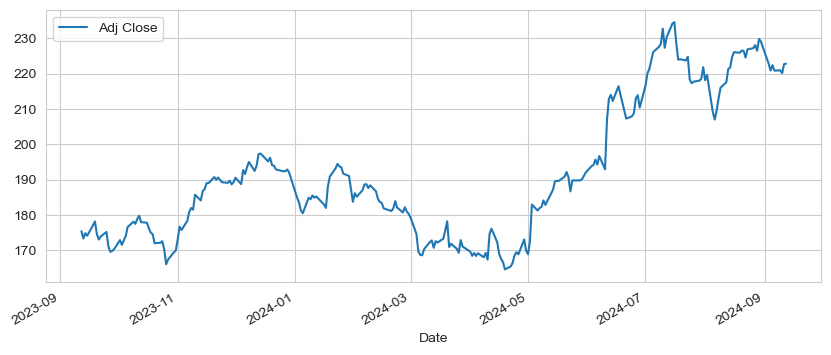

In [87]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

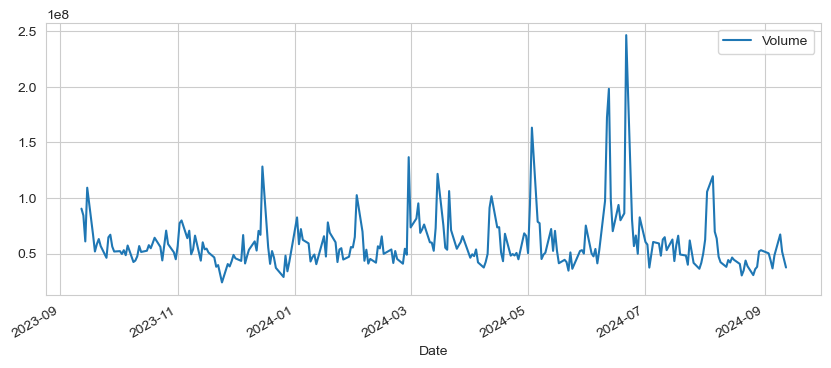

In [91]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [97]:


maday=[10,20,50]

for ma in maday:
    column = 'MA for %s days' %(str(ma))
    AAPL[column] = AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

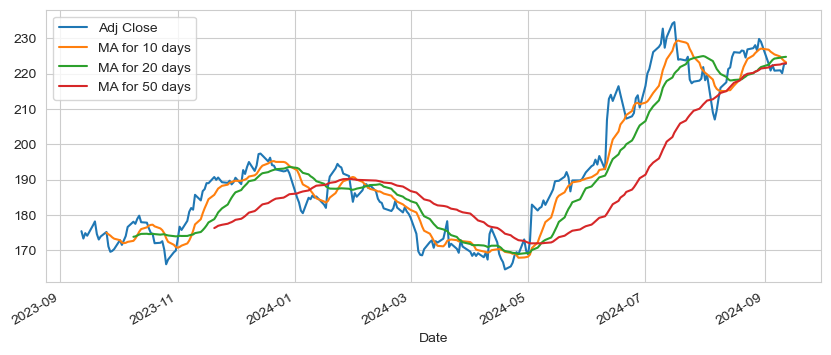

In [99]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

<Axes: xlabel='Date'>

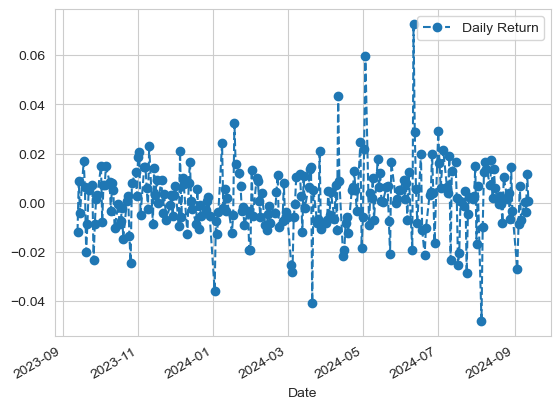

In [103]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True, linestyle='--', marker='o')

/var/folders/yk/0fr04jw54fn35qn5bbv2mxj80000gn/T/ipykernel_41766/139135022.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

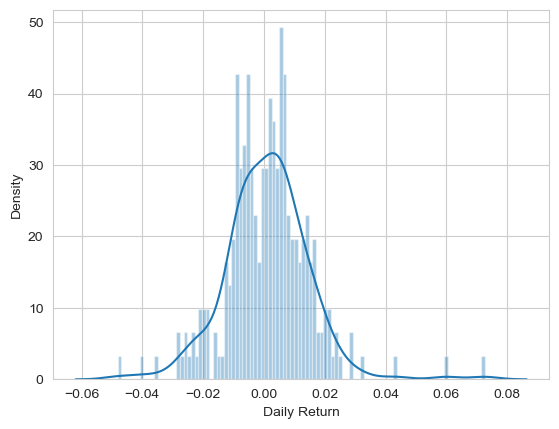

In [109]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [115]:
closingdf = yf.download(techlist, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [117]:
closingdf

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-09-12 00:00:00+00:00,175.402451,141.229996,135.736664,329.298248
2023-09-13 00:00:00+00:00,173.323090,144.850006,137.163162,333.556305
2023-09-14 00:00:00+00:00,174.845306,144.720001,138.649506,336.176636
2023-09-15 00:00:00+00:00,174.119019,140.389999,137.961197,327.759827
2023-09-18 00:00:00+00:00,177.063950,139.979996,138.619583,326.608459
...,...,...,...,...
2024-09-06 00:00:00+00:00,220.820007,171.389999,151.930008,401.700012
2024-09-09 00:00:00+00:00,220.910004,175.399994,149.539993,405.720001
2024-09-10 00:00:00+00:00,220.110001,179.550003,150.009995,414.200012


In [123]:
returns = closingdf.pct_change()
returns

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-09-12 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-09-13 00:00:00+00:00,-0.011855,0.025632,0.010509,0.012931
2023-09-14 00:00:00+00:00,0.008783,-0.000898,0.010836,0.007856
2023-09-15 00:00:00+00:00,-0.004154,-0.029920,-0.004964,-0.025037
2023-09-18 00:00:00+00:00,0.016913,-0.002920,0.004772,-0.003513
...,...,...,...,...
2024-09-06 00:00:00+00:00,-0.007015,-0.036539,-0.040794,-0.016381
2024-09-09 00:00:00+00:00,0.000408,0.023397,-0.015731,0.010007
2024-09-10 00:00:00+00:00,-0.003621,0.023660,0.003143,0.020901


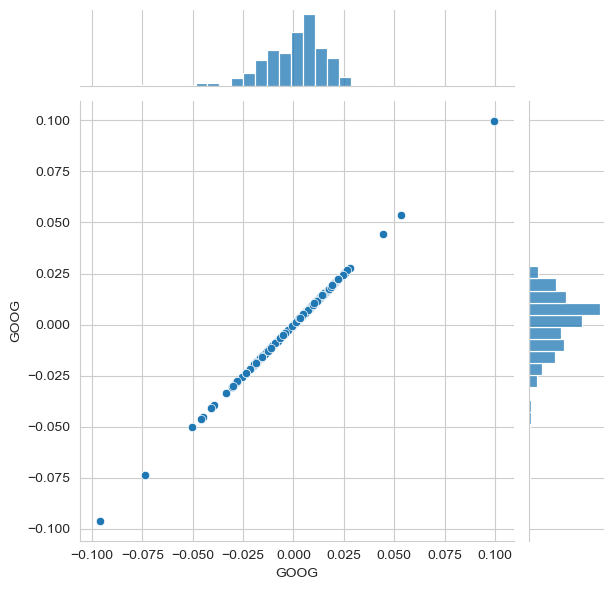

In [135]:
sns.jointplot(x='GOOG', y='GOOG', data=returns, kind='scatter')

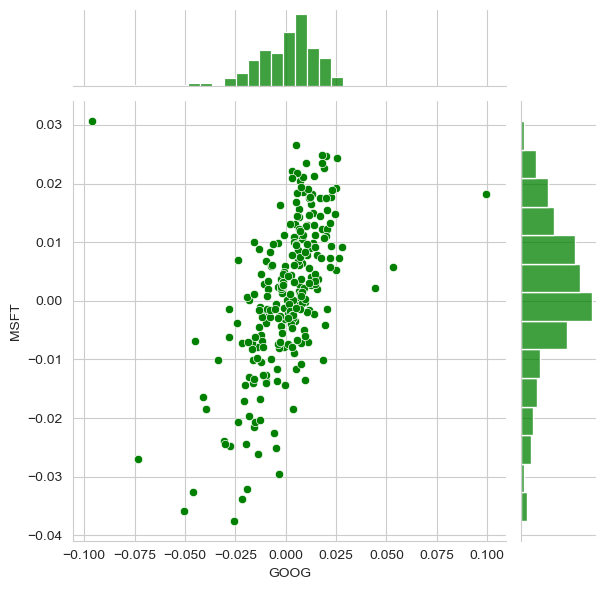

In [141]:
sns.jointplot(x='GOOG', y='MSFT', data=returns, kind='scatter', color='green')

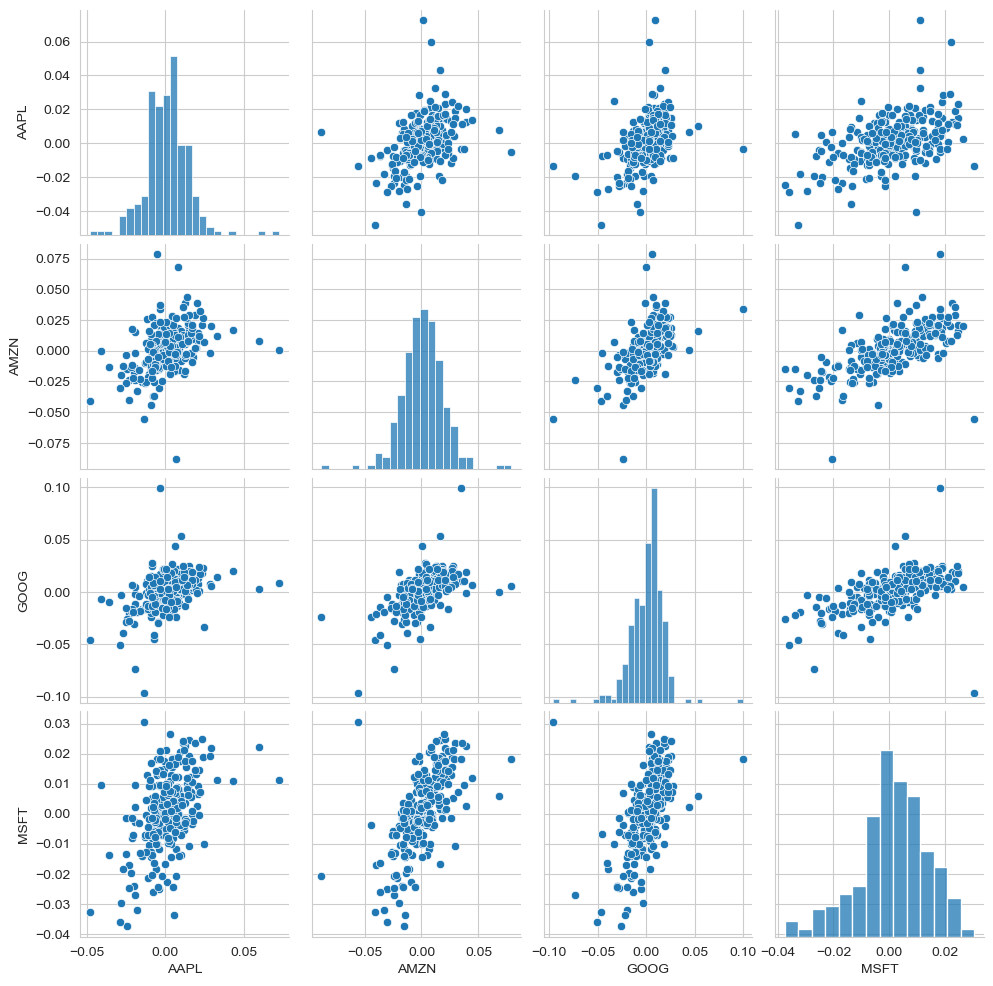

In [145]:
sns.pairplot(data=returns.dropna())

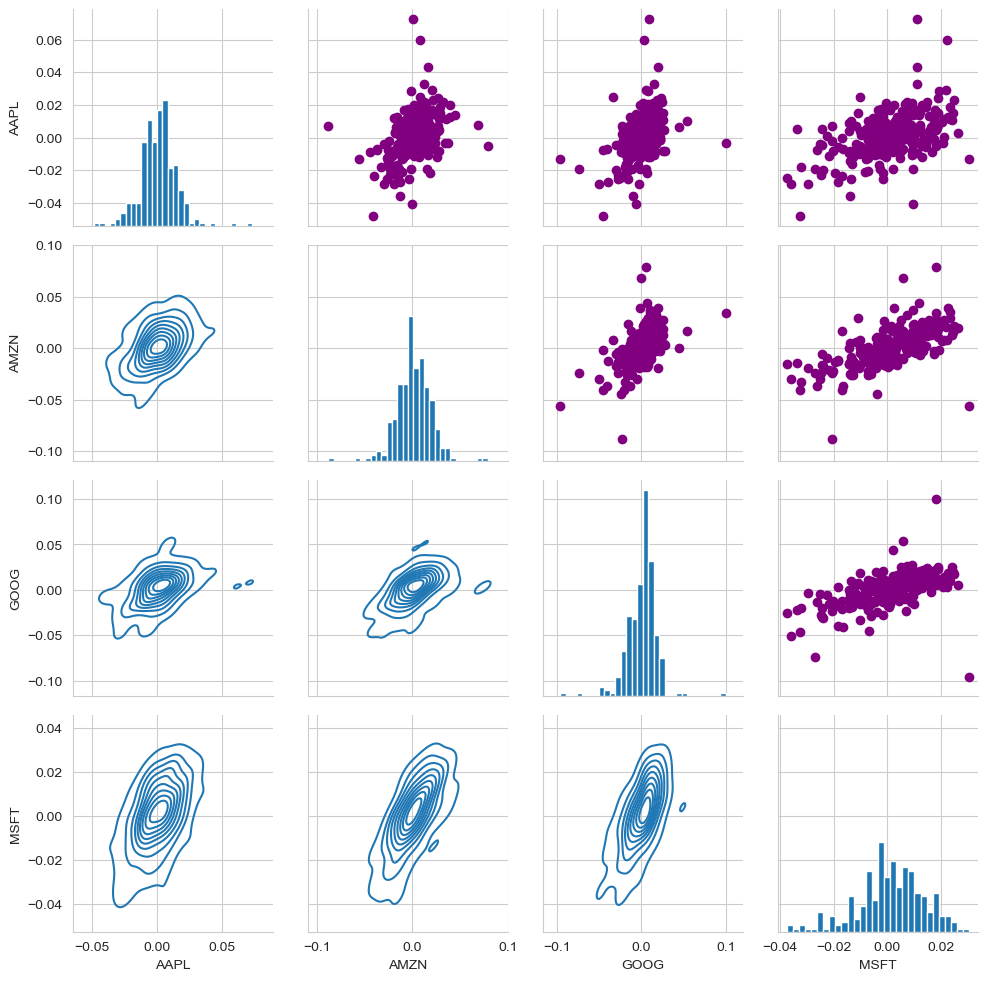

In [149]:
returnsfig= sns.PairGrid(returns.dropna())

returnsfig.map_upper(plt.scatter,color='purple')
returnsfig.map_lower(sns.kdeplot)
returnsfig.map_diag(plt.hist,bins=30)

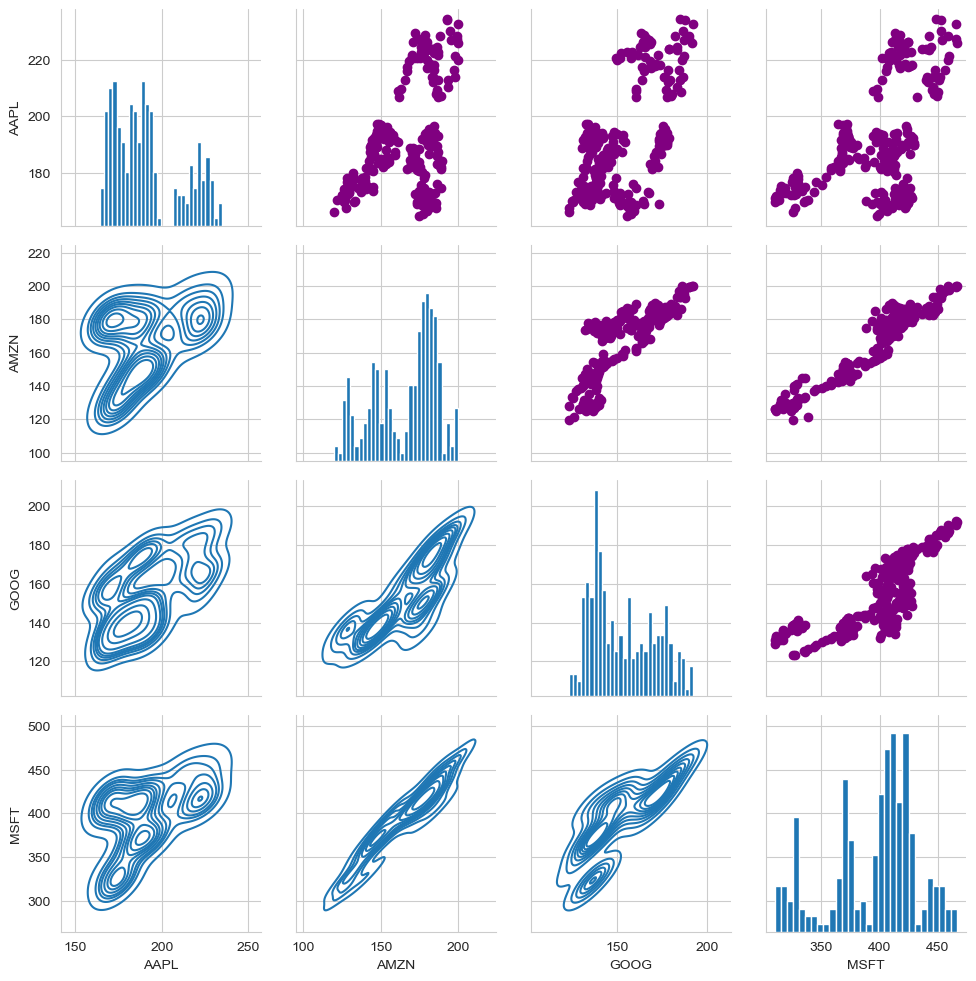

In [151]:
returnsfig= sns.PairGrid(closingdf)

returnsfig.map_upper(plt.scatter,color='purple')
returnsfig.map_lower(sns.kdeplot)
returnsfig.map_diag(plt.hist,bins=30)

<Axes: xlabel='Ticker', ylabel='Date'>

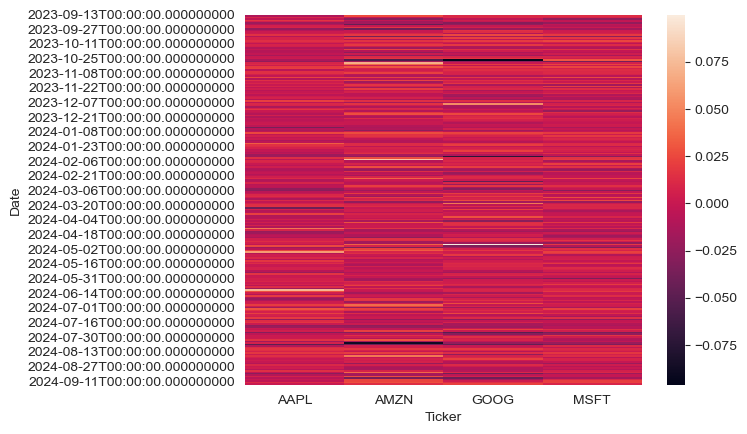

In [171]:

sns.heatmap(returns.dropna())

<Axes: xlabel='Ticker', ylabel='Date'>

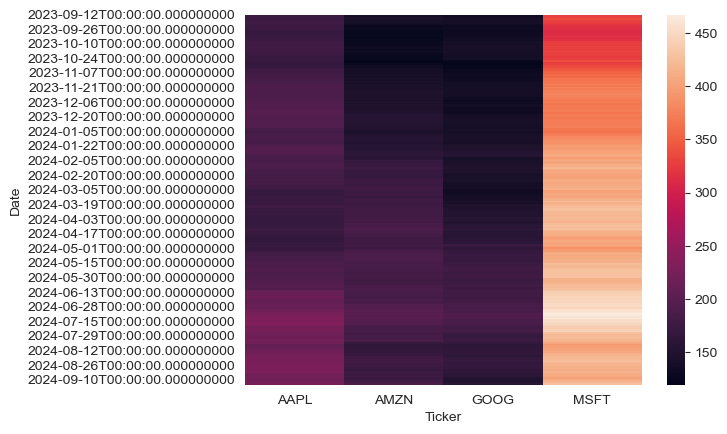

In [169]:
sns.heatmap(closingdf)

/var/folders/yk/0fr04jw54fn35qn5bbv2mxj80000gn/T/ipykernel_41766/2150004905.py:8: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(


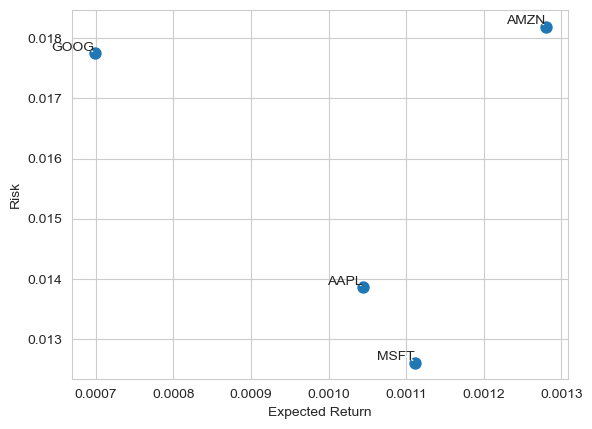

In [187]:
rets = returns.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

/var/folders/yk/0fr04jw54fn35qn5bbv2mxj80000gn/T/ipykernel_41766/3215012237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100 )


<Axes: xlabel='Daily Return', ylabel='Density'>

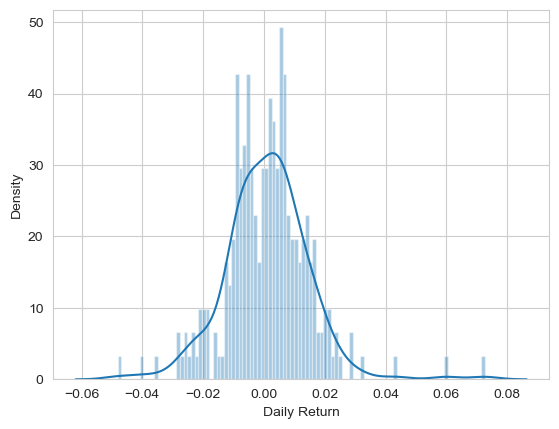

In [193]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100 )

In [195]:
rets['AAPL'].quantile(0.05)

-0.021262760199520513

In [197]:
days = 365

dt= 1/days

mu= rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [201]:
def stock_monte_carlo(startprice, days, mu, sigma):
    price= np.zeros(days)
    price[0] = startprice
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x]= np.random.normal(loc=mu*dt, scale= sigma*np.sqrt(dt))

        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [203]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-12,137.130005,137.639999,135.929993,136.070007,135.736664,15212900
2023-09-13,135.899994,137.699997,134.929993,137.500000,137.163162,16394900
2023-09-14,138.389999,139.550003,137.059998,138.990005,138.649506,19064600
2023-09-15,138.800003,139.360001,137.179993,138.300003,137.961197,48947600
2023-09-18,137.630005,139.929993,137.630005,138.960007,138.619583,16233600


Text(0.5, 1.0, 'Monte Carlo Google Analysis')

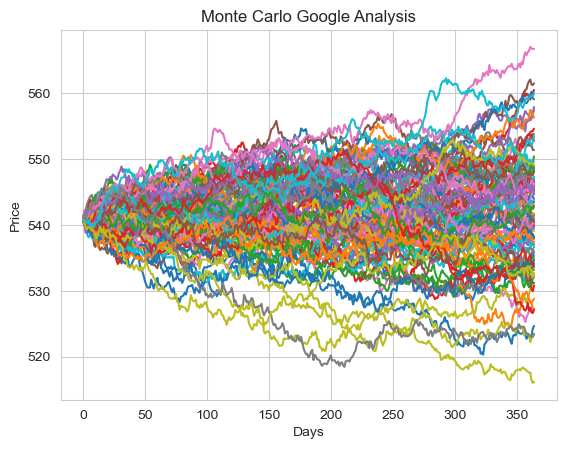

In [205]:
startprice = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(startprice, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Google Analysis')

In [209]:
runs = 10000

simulations = np.zeros(runs) 

for run in range(runs):
    simulations[run] = stock_monte_carlo(startprice, days, mu, sigma)[days-1]

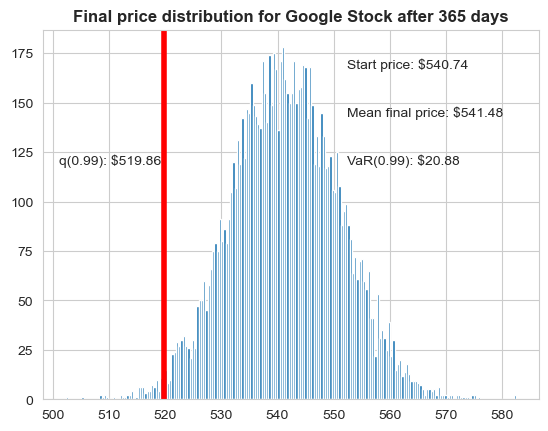

In [213]:
q= np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %startprice)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (startprice - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
'''1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.'''